<a href="https://colab.research.google.com/github/mthmadrid/analise_netflix/blob/main/olympics2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importanto

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.colors as mcolors

In [ ]:
# Importando o arquivo csv
df = pd.read_csv('https://raw.githubusercontent.com/mthmadrid/olympics2024/refs/heads/main/olympics2024.csv')

## Mostrando os Dados

In [ ]:
# Verificando o Dataset
df.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [ ]:
# Encontrando o número de elementos dentro do conjunto de dados
df.size

637

In [ ]:
# Encontrando o número de dimensões (linhas e colunas)
df.ndim

2

In [ ]:
# Encontrando o número de elementos em cada dimensão (linhas e colunas)
df.shape

(91, 7)

In [ ]:
# Descrição
df.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


In [ ]:
# Informação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


## Limpeza de Dados

In [ ]:
# Dados duplicados
df.duplicated().sum()

0

In [ ]:
# Verifica os valores nulos
df.isnull().sum().sort_values(ascending=False)

,0
Rank,0
Country,0
Country Code,0
Gold,0
Silver,0
Bronze,0
Total,0


In [ ]:
# Verificando os valores únicos para cada coluna
df.nunique()

,0
Rank,63
Country,91
Country Code,91
Gold,18
Silver,16
Bronze,19
Total,27


## Tratamento dos dados

### Medalha de Ouro

In [ ]:
# Calculando a Média
gold_medals_mean = df['Gold'].mean()
# Calculando a Mediana
gold_medals_median = df['Gold'].median()
# Calculando o Desvio Padrão
gold_medals_std = df['Gold'].std()
# Exibição
print(f"Média: {gold_medals_mean:.2f}\nMediana: {gold_medals_median:.2f}\nDesvio Padrão: {gold_medals_std:.2f}")

Média: 3.60
Mediana: 1.00
Desvio Padrão: 6.99


### Medalha de Prata

In [ ]:
# Calculando a Média
silver_medals_mean = df['Silver'].mean()
# Calculando a Mediana
silver_medals_median = df['Silver'].median()
# Calculando o Desvio Padrão
silver_medals_std = df['Silver'].std()
# Exibição
print(f"Média: {silver_medals_mean:.2f}\nMediana: {silver_medals_median:.2f}\nDesvio Padrão: {silver_medals_std:.2f}")

Média: 3.59
Mediana: 1.00
Desvio Padrão: 6.77


### Medalha de Bronze

In [ ]:
# Calculando a Média
bronze_medals_mean = df['Bronze'].mean()
# Calculando a Mediana
bronze_medals_median = df['Bronze'].median()
# Calculando o Desvio Padrão
bronze_medals_std = df['Bronze'].std()
# Exibição
print(f"Média: {bronze_medals_mean:.2f}\nMediana: {bronze_medals_median:.2f}\nDesvio Padrão: {bronze_medals_std:.2f}")

Média: 4.22
Mediana: 2.00
Desvio Padrão: 6.56


### Total de Medalhas

In [ ]:
# Calculando a Média
total_medals_mean = df['Total'].mean()
# Calculando a Mediana
total_medals_median = df['Total'].median()
# Calculando o Desvio Padrão
total_medals_std = df['Total'].std()
# Exibição
print(f"Média: {total_medals_mean:.2f}\nMediana: {total_medals_median:.2f}\nDesvio Padrão: {total_medals_std:.2f}")

Média: 11.42
Mediana: 5.00
Desvio Padrão: 19.70


## Gráficos

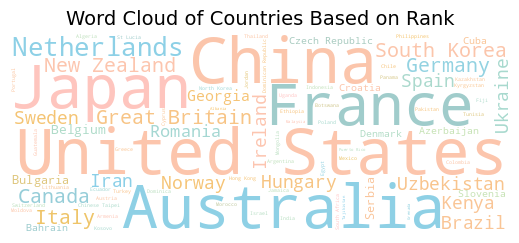

<Figure size 640x480 with 0 Axes>

In [ ]:
# Definindo as cores
cmap = mcolors.LinearSegmentedColormap.from_list("", ['#FFC5C5', '#F2C464', '#87CEEB', '#C6E2B5'])

# Prepare os dados de frequência
df['Frequency'] = df['Rank'].max() - df['Rank'] + 1
country_freq = dict(zip(df['Country'], df['Frequency']))

# Gerar a nuvem de palavras
wordcloud = WordCloud(background_color='white', width=500, height=200, colormap=cmap, max_words=91, contour_color='black', contour_width=2, collocations=False, random_state=42).generate_from_frequencies(country_freq)

# Exibir a nuvem de palavras
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Countries Based on Rank', fontsize=14)
plt.tight_layout(pad=0)
plt.show()
plt.savefig('wordcloud.png')

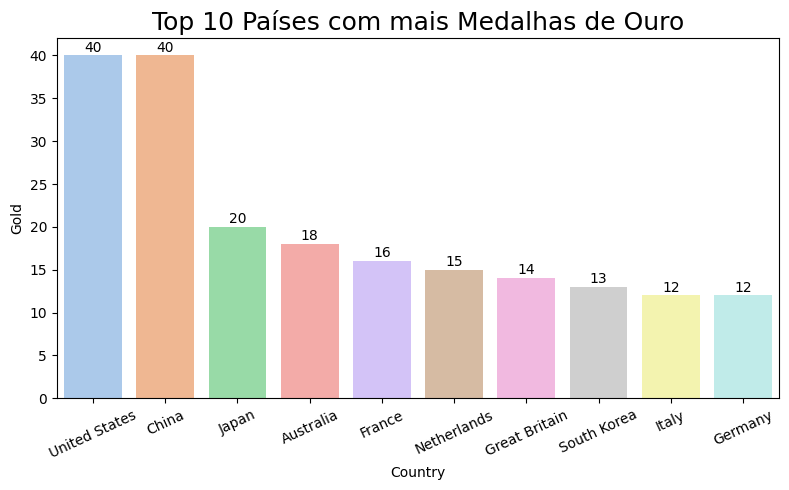

<Figure size 640x480 with 0 Axes>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Obter os 10 países com mais medalhas de ouro
top_10_gold = df.nlargest(10, 'Gold')

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=top_10_gold, x="Country", y="Gold", hue="Country", palette='pastel', legend=False)

# Configurações do gráfico
plt.xticks(rotation=25)
plt.title("Top 10 Países com mais Medalhas de Ouro", fontsize=18)

# Adicionar rótulos nas barras
for i, value in enumerate(top_10_gold['Gold']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Ajustar o layout
plt.tight_layout()
plt.show()
plt.savefig('top_10_gold.png')

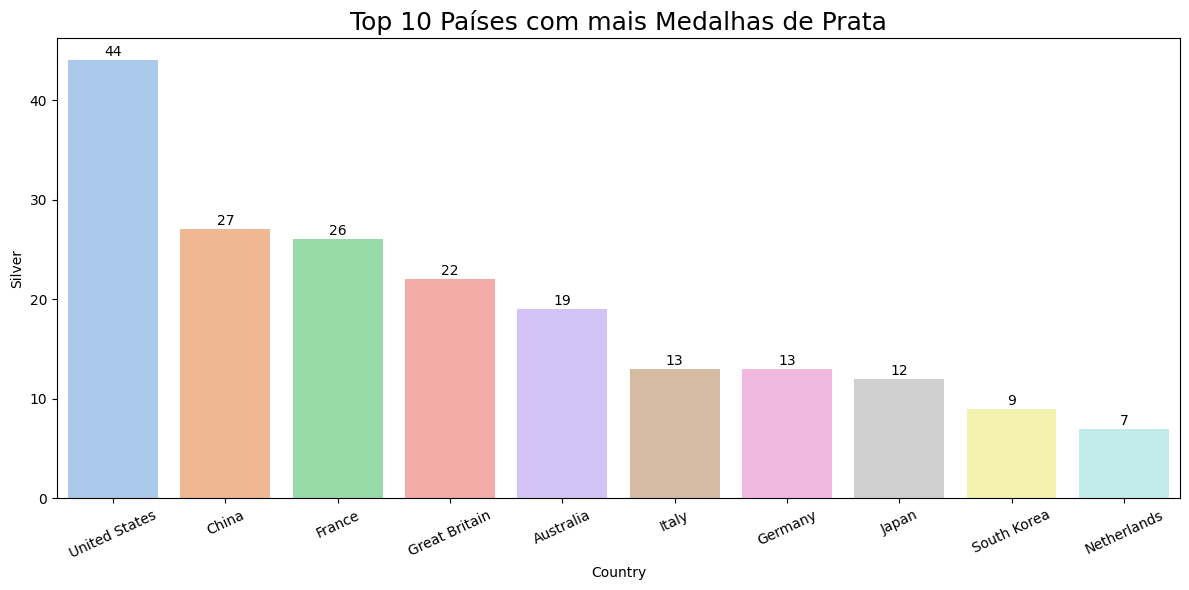

<Figure size 640x480 with 0 Axes>

In [ ]:
top_10_silver = df.nlargest(10, 'Silver')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_silver, x="Country", y="Silver", palette='pastel')

plt.xticks(rotation=25)
plt.title("Top 10 Países com mais Medalhas de Prata", fontsize=18)

for i, value in enumerate(top_10_silver['Silver']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
plt.savefig('top_10_silver.png')

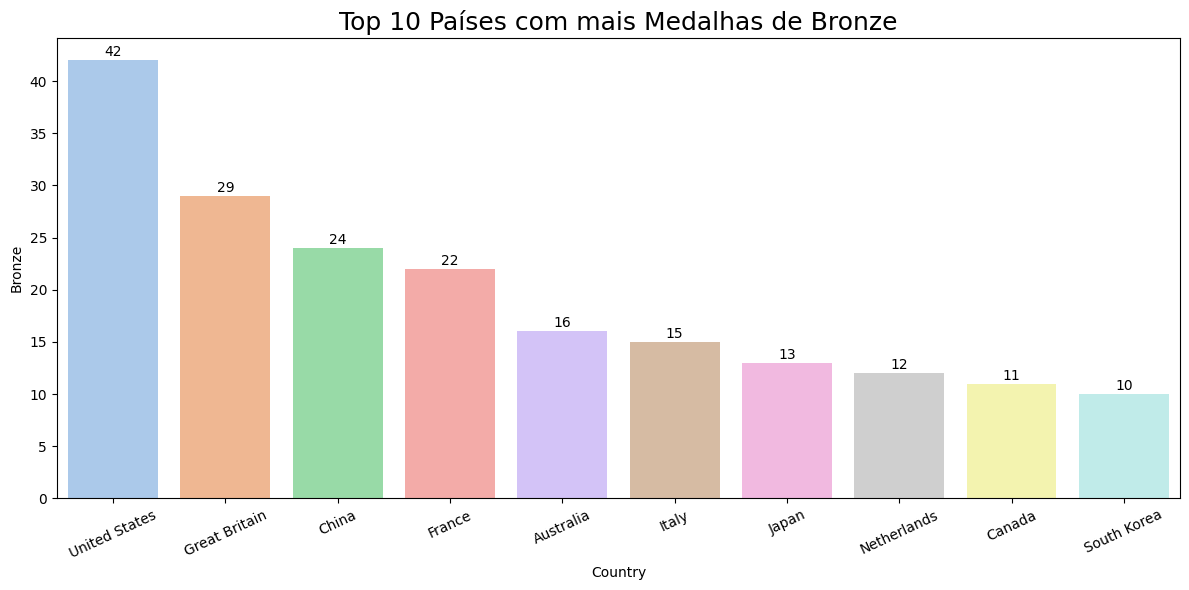

<Figure size 640x480 with 0 Axes>

In [ ]:
top_10_bronze = df.nlargest(10, 'Bronze')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_bronze, x="Country", y="Bronze", palette='pastel')

plt.xticks(rotation=25)
plt.title("Top 10 Países com mais Medalhas de Bronze", fontsize=18)

for i, value in enumerate(top_10_bronze['Bronze']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
plt.savefig('top_10_bronze.png')

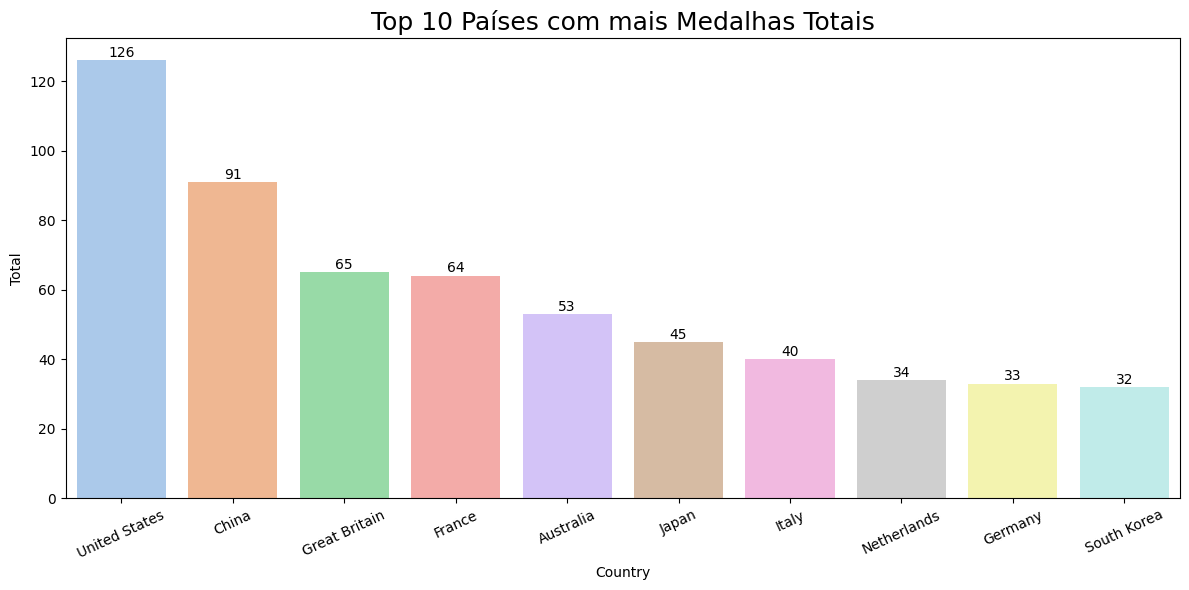

<Figure size 640x480 with 0 Axes>

In [ ]:
top_10_total = df.nlargest(10, 'Total')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_total, x="Country", y="Total", palette='pastel')

plt.xticks(rotation=25)
plt.title("Top 10 Países com mais Medalhas Totais", fontsize=18)

for i, value in enumerate(top_10_total['Total']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
plt.savefig('top_10_total.png')

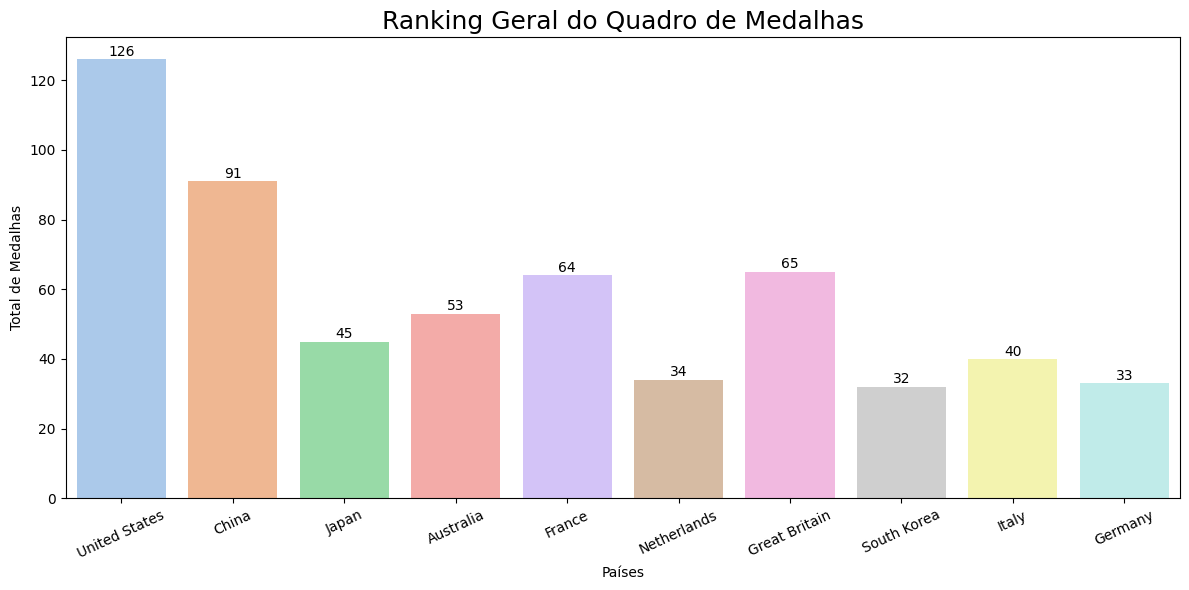

<Figure size 640x480 with 0 Axes>

In [ ]:
# Ordenar o DataFrame com base em ouro, prata e bronze
df_sorted = df.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False)

# Obter os 10 principais países baseados no ranking
top_10_ranking = df_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_ranking, x='Country', y='Total', palette='pastel')

plt.xticks(rotation=25)
plt.title("Ranking Geral do Quadro de Medalhas", fontsize=18)
plt.xlabel("Países")
plt.ylabel("Total de Medalhas")

for i, value in enumerate(top_10_ranking['Total']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
plt.savefig('top_10_ranking.png')

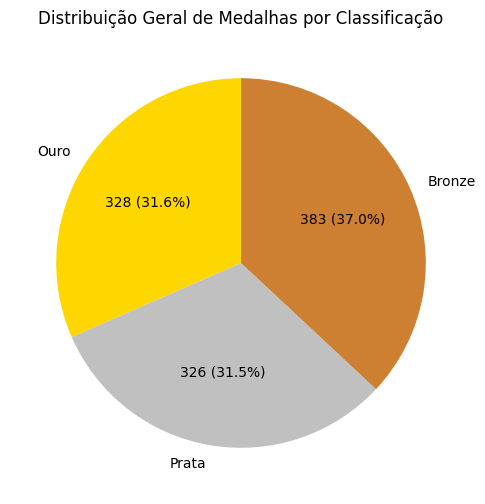

<Figure size 640x480 with 0 Axes>

In [ ]:
# Contagens totais de medalhas
total_gold = df['Gold'].sum()
total_silver = df['Silver'].sum()
total_bronze = df['Bronze'].sum()

medal_counts = [total_gold, total_silver, total_bronze]
medal_labels = ['Ouro', 'Prata', 'Bronze']
colors = ['#FFD700', '#C0C0C0', '#CD7F32']

# Criando função com o número e a porcentagem
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute} ({pct:.1f}%)'

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(medal_counts, labels=medal_labels, colors=colors, autopct=lambda pct: func(pct, medal_counts), startangle=90)

# Título e exibição do gráfico
plt.title('Distribuição Geral de Medalhas por Classificação')
plt.show()
plt.savefig('pie_chart.png')

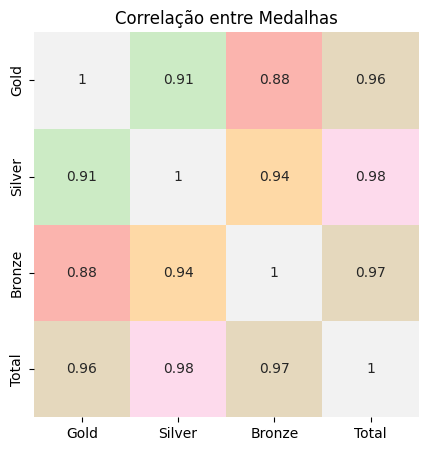

<Figure size 640x480 with 0 Axes>

In [ ]:
# Criar um gráfico de correlação
corr = df[['Gold', 'Silver', 'Bronze', 'Total']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr,
            annot=True,
            cmap='Pastel1',
            square=True,
            cbar=False)

plt.title('Correlação entre Medalhas')
plt.show()
plt.savefig('correlation_heatmap.png')